In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Taking the data from Quandle into variable 'data'
data = pd.read_csv('RELIANCE.csv')
#Printing the dataset
print(data)

       Symbol Series       Date  Prev Close  Adj_Open  Adj_High  Adj_Low  \
0    RELIANCE     EQ  02-Apr-19     1391.85   1398.00   1403.10  1380.10   
1    RELIANCE     EQ  03-Apr-19     1389.70   1392.75   1403.00  1372.00   
2    RELIANCE     EQ  04-Apr-19     1375.20   1379.00   1383.70  1347.25   
3    RELIANCE     EQ  05-Apr-19     1353.05   1360.95   1363.90  1343.00   
4    RELIANCE     EQ  08-Apr-19     1353.90   1356.00   1357.50  1323.70   
..        ...    ...        ...         ...       ...       ...      ...   
490  RELIANCE     EQ  24-Mar-21     2087.50   2079.75   2079.75  2040.40   
491  RELIANCE     EQ  25-Mar-21     2047.30   2054.00   2054.00  1985.00   
492  RELIANCE     EQ  26-Mar-21     1991.45   2012.00   2013.70  1973.70   
493  RELIANCE     EQ  30-Mar-21     1994.65   2008.00   2048.90  1991.55   
494  RELIANCE     EQ  31-Mar-21     2029.30   2018.00   2049.90  1999.00   

     Last Price  Adj_Close  Average Price  Total Traded Quantity  \
0       1388.20    

In [3]:
#Taking only necessary columns in dataset (for creating new columns)
data = data[['Adj_Open',  'Adj_High',  'Adj_Low',  'Adj_Close', 'Adj_Volume']]
#Printing the updated dataset
print(data)

     Adj_Open  Adj_High  Adj_Low  Adj_Close  Adj_Volume
0     1398.00   1403.10  1380.10    1389.70      168893
1     1392.75   1403.00  1372.00    1375.20      169662
2     1379.00   1383.70  1347.25    1353.05      177047
3     1360.95   1363.90  1343.00    1353.90      131955
4     1356.00   1357.50  1323.70    1329.25      216174
..        ...       ...      ...        ...         ...
490   2079.75   2079.75  2040.40    2047.30      222445
491   2054.00   2054.00  1985.00    1991.45      292881
492   2012.00   2013.70  1973.70    1994.65      296946
493   2008.00   2048.90  1991.55    2029.30      230499
494   2018.00   2049.90  1999.00    2003.10      193340

[495 rows x 5 columns]


In [4]:
#Creating new columns, and adding data for them using specific formula
data['HL_PCT'] = (data['Adj_High'] - data['Adj_Low']) / data['Adj_Close'] * 100.0
data['PCT_change'] = (data['Adj_Close'] - data['Adj_Open']) / data['Adj_Open'] * 100.0
#Taking only ncessary columns in final working dataset
data = data[['Adj_Close', 'HL_PCT', 'PCT_change', 'Adj_Volume']]
#Printing the updated dataset
print(data)

     Adj_Close    HL_PCT  PCT_change  Adj_Volume
0      1389.70  1.655033   -0.593705      168893
1      1375.20  2.254218   -1.260097      169662
2      1353.05  2.693914   -1.881798      177047
3      1353.90  1.543689   -0.518021      131955
4      1329.25  2.542787   -1.972714      216174
..         ...       ...         ...         ...
490    2047.30  1.922044   -1.560284      222445
491    1991.45  3.464812   -3.045278      292881
492    1994.65  2.005364   -0.862326      296946
493    2029.30  2.826098    1.060757      230499
494    2003.10  2.541061   -0.738355      193340

[495 rows x 4 columns]


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


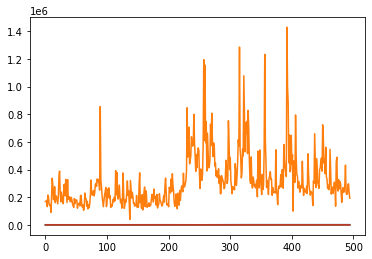

In [5]:
print(data["Adj_Close"].plot())
print(data["Adj_Volume"].plot())
print(data["PCT_change"].plot())
print(data["HL_PCT"].plot())

Visualizing correlation between features using heatmap -->



<AxesSubplot:>

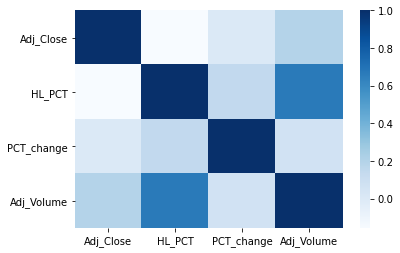

In [6]:
#Checking correlation among features
print("Visualizing correlation between features using heatmap -->\n")
sns.heatmap(data.corr(method='pearson'), cmap='Blues')

In [7]:
#Defining forecasting column
forecast_col = 'Adj_Close'

In [8]:
#Replacing NaN values with '-99999' value which is considered as an outlier by most ML classifiers
data.fillna(value=-99999, inplace=True)
#Forecasting out 1% of the dataset's length
forecast_out = int(math.ceil(0.01 * len(data)))
#Adding a new coumn for 'label'
data['label'] = data[forecast_col].shift(-forecast_out)

print(data)

     Adj_Close    HL_PCT  PCT_change  Adj_Volume    label
0      1389.70  1.655033   -0.593705      168893  1334.45
1      1375.20  2.254218   -1.260097      169662  1331.40
2      1353.05  2.693914   -1.881798      177047  1346.80
3      1353.90  1.543689   -0.518021      131955  1343.10
4      1329.25  2.542787   -1.972714      216174  1340.15
..         ...       ...         ...         ...      ...
490    2047.30  1.922044   -1.560284      222445      NaN
491    1991.45  3.464812   -3.045278      292881      NaN
492    1994.65  2.005364   -0.862326      296946      NaN
493    2029.30  2.826098    1.060757      230499      NaN
494    2003.10  2.541061   -0.738355      193340      NaN

[495 rows x 5 columns]


In [9]:
#Preparing X and y
X = np.array(data.drop(['label'], 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
data.dropna(inplace=True) #Dropping NaN values
y = np.array(data['label'])

In [10]:
#Splitting the data into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Training the linear regression model
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [11]:
#Predicting y values
y_predicted = clf.predict(X_test)
#Printing predicted values
print(y_predicted)

[2166.26962292 1981.12701119 2051.64618642 1579.18338738 2167.58800333
 1985.48778583 1494.71963997 1406.85703661 1254.81580929 1271.19278769
  996.61081463 2113.19057886 1120.51195101 2040.16295095 2014.80162922
 1413.42385858 2162.6102166  1990.57306232 2138.12587402 2108.01525448
 1448.52547604 2220.60735219 1186.64516733 1302.00206012 1889.41811209
 1580.91846205 1429.59664288 1245.27292781 2080.5182082  1581.52416185
 1436.48077156 1565.30165552  985.43775423 1228.96666772 1182.41731649
 1332.324648   1474.56774052 1358.10746566 1478.00638798 1426.70268647
 1237.2213113  1581.99144752 1908.0186504  1962.96644339 1261.074149
 2068.52782731 1922.48407    1448.40319665 1607.79265884 1551.85129599
 1704.25858072 1214.26101759 1986.32991619 1447.49094191 1570.3567283
 1309.4162737  2121.97223392 1462.50123526 1995.1909398  1203.97735529
 1506.08851562 1925.25881554 1298.18763757 1590.40996608 1345.76591345
 1350.36921698 1482.21262262 1489.48895932 1975.15288545 1967.78674553
 1285.441

Actual values -->
[2029, 1994, 2002, 1615, 2108, 1987, 1431, 1392, 1241, 1268, 1082, 2126, 1080, 1850, 2106, 1466, 2137, 1964, 2118, 2082]

Predicted values -->
[2166, 1981, 2051, 1579, 2167, 1985, 1494, 1406, 1254, 1271, 996, 2113, 1120, 2040, 2014, 1413, 2162, 1990, 2138, 2108]





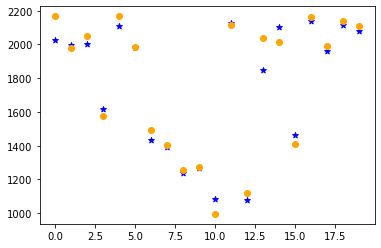

In [12]:
temp1 = []
temp2 = []
temp3 = []
for i in range(20):
  temp1.append(int(y_test[i]))
for i in range(20):
  temp2.append(int(y_predicted[i]))
for i in range(20):
  temp3.append(i)
#Printing original values
print("Actual values -->")
print(temp1)
#Printing predicted values
print("\nPredicted values -->")
print(temp2)
print("\n"*2)
plt.scatter(temp3, temp1, marker="*", color = 'blue')
plt.scatter(temp3, temp2, color = 'orange')

In [13]:
print("\nPredicted values -->")


Predicted values -->
